In [1]:
import nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
reviews = pd.read_csv('C:/Users/Subhadri/Desktop/Data Science/Term 2/Unstructured Data Analysis/Text Analytics/K8 Reviews v0.2.csv')
reviews.head()

sentiment                                             review
0          1             Good but need updates and improvements
1          0  Worst mobile i have bought ever, Battery is dr...
2          1  when I will get my 10% cash back.... its alrea...
3          1                                               Good
4          0  The worst phone everThey have changed the last...

### Insights:
- If the rating given by the customer is 1, 2, 3  -> sentiment is 0.
- If the rating given by the customer is 4, 5  -> sentiment is 1.

In [4]:
reviews.shape

(14675, 2)

In [5]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

### Plot the word cloud and the bar graph for the reviews

In [6]:
from wordcloud import WordCloud

In [7]:
reviews_combined = " ".join(reviews.review.values)
reviews_combined

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don\'t know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me. when I will get my 10% cash back.... its already 15 January.. Good The worst phone everThey have changed the last phone but the problem is still same and the amazon is not returning the phone .Highly disappointing of amazon Only I\'m telling don\'t buyI\'m totally disappointedPoor batteryPoor cameraWaste of money Phone is awesome. But while charging, it heats up allot..Really a genuine reason to hate Lenovo k8 note The battery level has worn down It\'s over hitting problems...an

In [8]:
reviews_combined[:100]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hel'

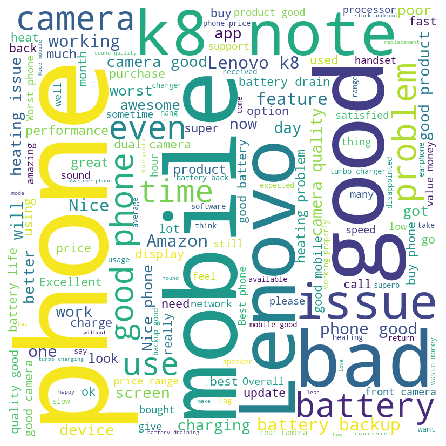

In [9]:
word_cloud = WordCloud(width = 800, height = 800, background_color = 'white', max_words = 150).\
generate_from_text(reviews_combined)
plt.figure(figsize = (10,6))
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

In [10]:
list1 = []
for i in reviews_combined.split():
    list1.append(i)
list1
dict1 = {}
for i in list1:
    dict1[i] = dict1.get(i,0) + 1
# print(dict1)
ser1 = pd.Series(dict1)
ser1
wordcount_df = pd.DataFrame(ser1).reset_index()
wordcount_df.head()

index     0
0     Good  1315
1      but  2222
2     need   196
3  updates    98
4      and  5078

In [11]:
wc_df = wordcount_df.rename(columns = {'index':'Words', 0:'Count'})
top_25_words = wc_df.sort_values(ascending = False, by = 'Count').head(25)
top_25_words

Words  Count
13        is  10151
94       the   5565
41       not   5162
4        and   5078
91     phone   4766
20        to   4627
75      this   3833
143       in   3445
28         I   3418
185     good   3348
74       for   3007
121        a   2981
57        it   2975
70        of   2832
178     very   2567
23      with   2392
1        but   2222
52   battery   2155
246   camera   2095
7     mobile   1654
203  product   1419
195       on   1392
458       as   1361
0       Good   1315
46       are   1289

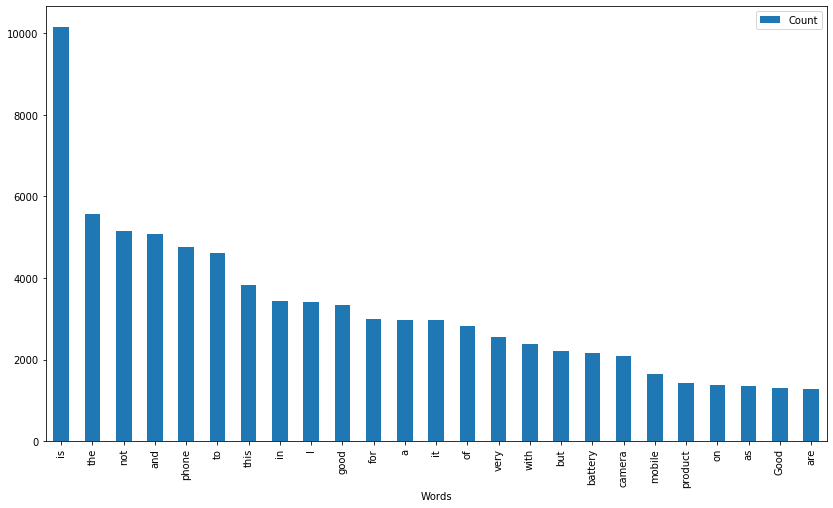

In [12]:
top_25_words.plot(kind = 'bar', x = 'Words', y = 'Count', figsize = (14,8))
plt.show()

### Problems with the above visuals:
    1. case is non uniform.
    2. punctuation and stop words.
    3. words with different tense forms like charged, charging, charges has its root from in charge.

In [13]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import regexp_tokenize

In [14]:
all_terms = word_tokenize(reviews_combined.lower())
print(all_terms)

['good', 'but', 'need', 'updates', 'and', 'improvements', 'worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup', 'is', 'only', '6', 'to', '7', 'hours', 'with', 'internet', 'uses', ',', 'even', 'if', 'i', 'put', 'mobile', 'idle', 'its', 'getting', 'discharged.this', 'is', 'biggest', 'lie', 'from', 'amazon', '&', 'lenove', 'which', 'is', 'not', 'at', 'all', 'expected', ',', 'they', 'are', 'making', 'full', 'by', 'saying', 'that', 'battery', 'is', '4000mah', '&', 'booster', 'charger', 'is', 'fake', ',', 'it', 'takes', 'at', 'least', '4', 'to', '5', 'hours', 'to', 'be', 'fully', 'charged.do', "n't", 'know', 'how', 'lenovo', 'will', 'survive', 'by', 'making', 'full', 'of', 'us.please', 'don', ';', 't', 'go', 'for', 'this', 'else', 'you', 'will', 'regret', 'like', 'me', '.', 'when', 'i', 'will', 'get', 'my', '10', '%', 'cash', 'back', '...', '.', 'its', 'already', '15', 'january..', 'good', 'the', 'worst', 'phone', 'everthey', 'have

In [15]:
from nltk.probability import FreqDist
fdist = FreqDist(all_terms)
fdist

FreqDist({'.': 13530, 'is': 10386, ',': 6890, 'phone': 6565, 'the': 6526, 'not': 6030, 'good': 5717, 'and': 5413, 'it': 5375, 'to': 4697, ...})

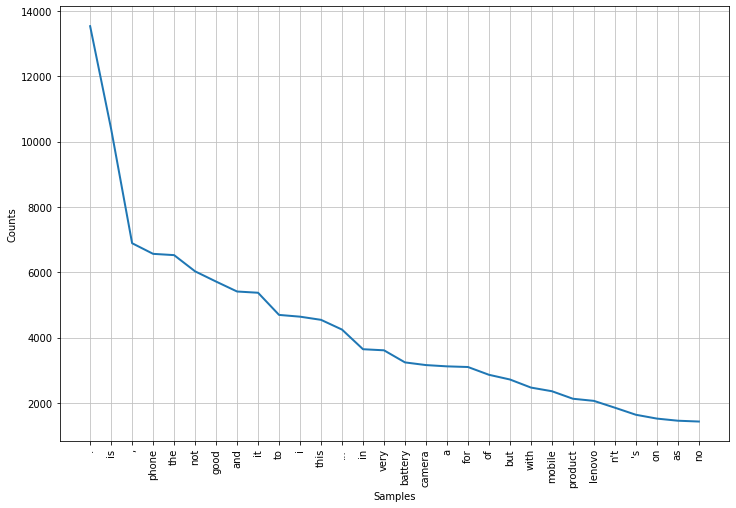

In [16]:
plt.figure(figsize = (12,8))
fdist.plot(30, cumulative = False)
plt.show()

The most commonly used and the least commonly used words in any language includes:
        1. language connectors called stop words.
        2. punctuations

In [17]:
from string import punctuation
from nltk.corpus import stopwords

In [18]:
stop_nltk = stopwords.words('english')
print(stop_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
stop_updated = stop_nltk + ["...", "..", "!!"] + ["phone", "mobile", "lenovo", "k8", "note", "amazon", "n't"]
reviews_updated1 = [term for term in all_terms if term not in stop_updated \
                   and term not in list(punctuation) and len(term) > 2]
print(reviews_updated1)

['good', 'need', 'updates', 'improvements', 'worst', 'bought', 'ever', 'battery', 'draining', 'like', 'hell', 'backup', 'hours', 'internet', 'uses', 'even', 'put', 'idle', 'getting', 'discharged.this', 'biggest', 'lie', 'lenove', 'expected', 'making', 'full', 'saying', 'battery', '4000mah', 'booster', 'charger', 'fake', 'takes', 'least', 'hours', 'fully', 'charged.do', 'know', 'survive', 'making', 'full', 'us.please', 'else', 'regret', 'like', 'get', 'cash', 'back', 'already', 'january..', 'good', 'worst', 'everthey', 'changed', 'last', 'problem', 'still', 'returning', '.highly', 'disappointing', 'telling', 'buyi', 'totally', 'disappointedpoor', 'batterypoor', 'camerawaste', 'money', 'awesome', 'charging', 'heats', 'allot..really', 'genuine', 'reason', 'hate', 'battery', 'level', 'worn', 'hitting', 'problems', 'hanging', 'problems', 'service', 'station', 'ahmedabad', 'one', 'years', 'warranty', 'change', 'lot', 'glitches', 'dont', 'buy', 'thing', 'better', 'options', 'wrost', 'good', '

In [20]:
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [21]:
stemmer_p = PorterStemmer()
stemmer_s = SnowballStemmer('english')

In [22]:
stemmer_p_words = [stemmer_p.stem(i) for i in reviews_updated1]
stemmer_s_words = [stemmer_s.stem(i) for i in reviews_updated1]
print(len(set(stemmer_p_words)), len(set(stemmer_s_words)))

16245 16161


In [23]:
lemm = WordNetLemmatizer()

In [24]:
lemm_words = [lemm.lemmatize(i) for i in reviews_updated1]
print(len(set(lemm_words)))

17901


In [25]:
# Combine all the steps and create a user-defined function
# Takes one review as input and returns a cleaned review as a string

def clean_text(sent):
    tokens = word_tokenize(sent.lower())
    stemmed = [stemmer_s.stem(term) for term in tokens
              if term not in stop_updated and
              term not in list(punctuation) and len(term) > 2]
    res = " ".join(stemmed)
    return res

reviews['clean_review'] = reviews.review.apply(clean_text)

In [26]:
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                        clean_review  
0                             good need updat improv  
1  worst bought ever batteri drain like hell back...  
2                    get cash back alreadi january..  
3                                               good  
4  worst everthey chang last problem still return...

### Q. Customize the stop words such that words “no, nor, not” are not removed from the corpus.

In [27]:
stop_updated

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
stop_updated1 = set(stop_updated) - {'no', 'nor', 'not'}
print(list(stop_updated1))

['on', 'hasn', 'do', 'further', 'wouldn', 'am', 's', 'same', 'only', '..', 'doesn', '!!', "won't", 'phone', 'be', 'both', 'who', 'very', 'note', "shan't", 'an', 'i', 'his', 'doing', 'for', 'into', 'to', "aren't", 'during', 'what', 'a', 'isn', 'mobile', 'while', 'him', 't', 'all', 'why', 'herself', 'when', 'our', 'these', 'myself', "it's", 'aren', 'now', 'with', 'their', 'ours', 'it', 'didn', 'at', 'lenovo', 'her', 'once', 'that', 'll', 'was', 'whom', 'themselves', 'until', "couldn't", 'again', 'mustn', "you'd", 'this', "that'll", 'after', 'in', 'can', 'how', 'of', 'up', 'out', 'm', 'being', 'will', 'here', '...', 'over', 're', 'we', 'itself', 'as', 'such', "didn't", "wouldn't", 'few', 'other', 'each', 'through', 'from', "you've", "should've", 'is', "doesn't", "isn't", "you'll", 'did', 'which', 'than', 'yours', 'wasn', 'should', 'own', 'too', 'you', 'off', 'y', 'ourselves', 'they', 'ain', 'or', "hadn't", "you're", 'shouldn', 'me', 'amazon', 'been', 'weren', 'below', "shouldn't", 'are', 

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                        clean_review  
0                             good need updat improv  
1  worst bought ever batteri drain like hell back...  
2                    get cash back alreadi january..  
3                                               good  
4  worst everthey chang last problem still return...

In [31]:
cv_bg = CountVectorizer(ngram_range = (2,2), max_features = 25)

In [32]:
bg = cv_bg.fit_transform(reviews['clean_review'])
cv_bg.get_feature_names()

['also good',
 'batteri back',
 'batteri backup',
 'batteri drain',
 'batteri life',
 'call record',
 'camera good',
 'camera qualiti',
 'drain fast',
 'dual camera',
 'front camera',
 'get heat',
 'good batteri',
 'good camera',
 'good product',
 'heat issu',
 'heat problem',
 'price rang',
 'qualiti good',
 'rear camera',
 'turbo charg',
 'turbo charger',
 'valu money',
 'wast money',
 'work proper']

In [33]:
DTM_bg = pd.DataFrame(bg.toarray(), columns = cv_bg.get_feature_names())
DTM_bg.head()

also good  batteri back  batteri backup  batteri drain  batteri life  \
0          0             0               0              0             0   
1          0             0               0              1             0   
2          0             0               0              0             0   
3          0             0               0              0             0   
4          0             0               0              0             0   

   call record  camera good  camera qualiti  drain fast  dual camera  ...  \
0            0            0               0           0            0  ...   
1            0            0               0           0            0  ...   
2            0            0               0           0            0  ...   
3            0            0               0           0            0  ...   
4            0            0               0           0            0  ...   

   heat issu  heat problem  price rang  qualiti good  rear camera  \
0          0             0           0             0            0   
1          0             0           0             0            0   
2          0             0           0             0            0   
3          0             0           0             0            0   
4          0             0           0             0            0   

   turbo charg  turbo charger  valu money  wast money  work proper  
0            0              0           0           0            0  
1            0              0           0           0            0  
2            0              0           0           0            0  
3            0              0           0           0            0  
4            0              0           0           0            0  

[5 rows x 25 columns]

In [34]:
top_25_bg = DTM_bg.sum().sort_values(ascending = False)
top_25_bg

batteri backup    593
batteri drain     490
camera qualiti    473
heat issu         397
good product      378
camera good       374
heat problem      340
dual camera       298
good batteri      287
drain fast        278
batteri life      272
good camera       248
work proper       234
get heat          224
qualiti good      217
valu money        210
wast money        190
front camera      189
call record       183
price rang        182
turbo charger     182
turbo charg       176
batteri back      176
rear camera       168
also good         164
dtype: int64

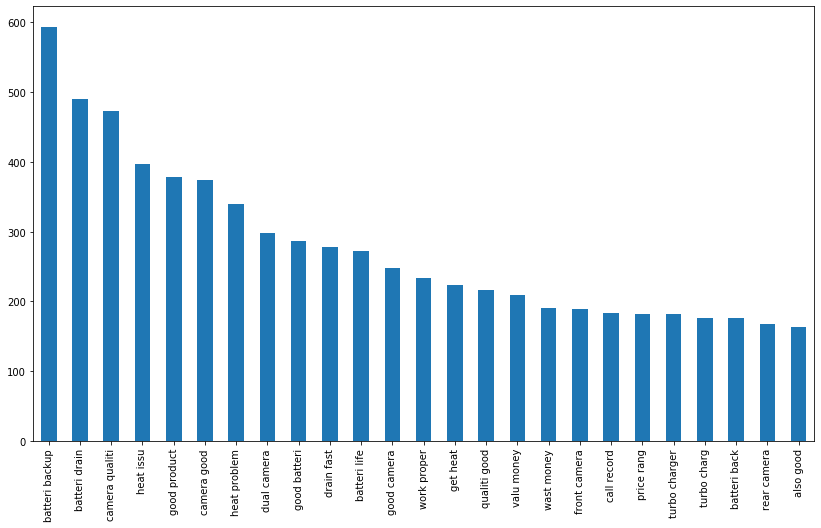

In [35]:
top_25_bg.plot(kind = 'bar', x = 'Words', y = 'Count', figsize = (14,8))
plt.show()

In [36]:
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                        clean_review  
0                             good need updat improv  
1  worst bought ever batteri drain like hell back...  
2                    get cash back alreadi january..  
3                                               good  
4  worst everthey chang last problem still return...

In [37]:
afinn = pd.read_csv('C:/Users/Subhadri/Desktop/Data Science/Term 2/Unstructured Data Analysis/Text Analytics/AFINN-111.txt', \
                    sep = '\t', header = None)
afinn.head()

0  1
0    abandon -2
1  abandoned -2
2   abandons -2
3   abducted -2
4  abduction -2

In [38]:
afinn.columns = ['Term', 'Score']
afinn.head()

Term  Score
0    abandon     -2
1  abandoned     -2
2   abandons     -2
3   abducted     -2
4  abduction     -2

In [39]:
term_scores = dict(afinn.values)
print(term_scores)

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3, 'ado

In [40]:
def get_sentiment(txt1):
    score = 0
    tokens = word_tokenize(txt1.lower())
    for term in tokens:
        score += term_scores.get(term, 0)
    return score

In [41]:
reviews['sent_score'] = reviews['clean_review'].apply(get_sentiment)
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                        clean_review  sent_score  
0                             good need updat improv           3  
1  worst bought ever batteri drain like hell back...          -8  
2                    get cash back alreadi january..           0  
3                                               good           3  
4  worst everthey chang last problem still return...          -7

In [42]:
reviews['sent_prediction'] = reviews['sent_score'].apply(lambda x:1 if x>0 else 0)
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                        clean_review  sent_score  \
0                             good need updat improv           3   
1  worst bought ever batteri drain like hell back...          -8   
2                    get cash back alreadi january..           0   
3                                               good           3   
4  worst everthey chang last problem still return...          -7   

   sent_prediction  
0                1  
1                0  
2                0  
3                1  
4                0

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(reviews.sentiment, reviews.sent_prediction) * 100

71.18228279386713

In [45]:
def clean_text(sent):
    tokens = word_tokenize(sent.lower())
    not_stemmed = [term for term in tokens
              if term not in stop_updated and
              term not in list(punctuation) and len(term) > 2]
    res = " ".join(not_stemmed)
    return res

reviews['clean_review_not_stemmed'] = reviews.review.apply(clean_text)

In [46]:
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                        clean_review  sent_score  \
0                             good need updat improv           3   
1  worst bought ever batteri drain like hell back...          -8   
2                    get cash back alreadi january..           0   
3                                               good           3   
4  worst everthey chang last problem still return...          -7   

   sent_prediction                           clean_review_not_stemmed  
0                1                     good need updates improvements  
1                0  worst bought ever battery draining like hell b...  
2                0                    get cash back already january..  
3                1                                               good  
4                0  worst everthey changed last problem still retu...

In [47]:
def get_sentiment2(txt2):
    score2 = 0
    tokens2 = word_tokenize(txt2.lower())
    for term in tokens2:
        score2 += term_scores.get(term, 0)
    return score2

In [48]:
reviews['sent_score_w/o_stemming'] = reviews['clean_review_not_stemmed'].apply(get_sentiment2)
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                        clean_review  sent_score  \
0                             good need updat improv           3   
1  worst bought ever batteri drain like hell back...          -8   
2                    get cash back alreadi january..           0   
3                                               good           3   
4  worst everthey chang last problem still return...          -7   

   sent_prediction                           clean_review_not_stemmed  \
0                1                     good need updates improvements   
1                0  worst bought ever battery draining like hell b...   
2                0                    get cash back already january..   
3                1                                               good   
4                0  worst everthey changed last problem still retu...   

   sent_score_w/o_stemming  
0                        3  
1                       -8  
2                        0  
3                        3  
4                       -7

In [49]:
reviews['sent_prediction2'] = reviews['sent_score_w/o_stemming'].apply(lambda x:1 if x>0 else 0)
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                        clean_review  sent_score  \
0                             good need updat improv           3   
1  worst bought ever batteri drain like hell back...          -8   
2                    get cash back alreadi january..           0   
3                                               good           3   
4  worst everthey chang last problem still return...          -7   

   sent_prediction                           clean_review_not_stemmed  \
0                1                     good need updates improvements   
1                0  worst bought ever battery draining like hell b...   
2                0                    get cash back already january..   
3                1                                               good   
4                0  worst everthey changed last problem still retu...   

   sent_score_w/o_stemming  sent_prediction2  
0                        3                 1  
1                       -8                 0  
2                        0                 0  
3                        3                 1  
4                       -7                 0

In [50]:
accuracy_score(reviews.sentiment, reviews.sent_prediction2) * 100

74.67802385008517

In [51]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [52]:
def get_sentiment_vader(text):
    return analyser.polarity_scores(text)['compound']

In [53]:
reviews['vader_score'] = reviews['review'].apply(get_sentiment_vader)
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                        clean_review  sent_score  \
0                             good need updat improv           3   
1  worst bought ever batteri drain like hell back...          -8   
2                    get cash back alreadi january..           0   
3                                               good           3   
4  worst everthey chang last problem still return...          -7   

   sent_prediction                           clean_review_not_stemmed  \
0                1                     good need updates improvements   
1                0  worst bought ever battery draining like hell b...   
2                0                    get cash back already january..   
3                1                                               good   
4                0  worst everthey changed last problem still retu...   

   sent_score_w/o_stemming  sent_prediction2  vader_score  
0                        3                 1       0.5994  
1                       -8                 0      -0.8720  
2                        0                 0       0.0000  
3                        3                 1       0.4404  
4                       -7                 0      -0.8289

In [54]:
reviews['vader_prediction'] = reviews['vader_score'].apply(lambda x:1 if x>0.3 else 0)

In [55]:
accuracy_score(reviews.sentiment, reviews.vader_prediction) * 100

79.90459965928449

### Sentiment Prediction Starategy 3: Building our own model

In [56]:
x = reviews['clean_review']
y = reviews['sentiment']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 31)

In [59]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
#count_vect = CountVectorizer()
tfidf_vect = TfidfVectorizer()

In [61]:
#x_train_bow = count_vect.fit_transform(x_train)
#x_test_bow = count_vect.transform(x_test)
x_train_bow = tfidf_vect.fit_transform(x_train)
x_test_bow = tfidf_vect.transform(x_test)
print(x_train_bow.shape, x_test_bow.shape)

(11740, 9217) (2935, 9217)


### Model building using Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [63]:
log_reg = LogisticRegression()

In [64]:
log_reg.fit(x_train_bow, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
y_test_pred = log_reg.predict(x_test_bow)

In [66]:
accuracy_score(y_test, y_test_pred) * 100 # In case of CountVectorizer, accuracy is 85.10%

86.16695059625214

### KMeans Clustering

### Document Clustering

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(max_features=150)

In [68]:
X = tfidfvectorizer.fit_transform(reviews['clean_review'])

In [69]:
from sklearn.cluster import KMeans

In [70]:
num_clusters = 6
km = KMeans(n_clusters = num_clusters, random_state = 0)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [71]:
pred_cluster = km.predict(X)
reviews['cluster_predicted'] = pred_cluster
reviews['cluster_predicted'].value_counts()

5    6366
2    2774
3    2354
0    1146
4    1114
1     921
Name: cluster_predicted, dtype: int64

In [72]:
pred_cluster.shape

(14675,)

In [73]:
km.cluster_centers_.shape

(6, 150)

In [74]:
print("Top 5 terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidfvectorizer.get_feature_names()
for i in range(num_clusters):
    print ("Cluster %d:" % i),
    for ind in order_centroids[i, : 5]:
        print (' %s' % terms[ind])

Top 5 terms per cluster:
Cluster 0:
 good
 one
 price
 batteri
 perform
Cluster 1:
 nice
 product
 good
 one
 camera
Cluster 2:
 heat
 batteri
 problem
 charg
 issu
Cluster 3:
 camera
 good
 qualiti
 bad
 batteri
Cluster 4:
 product
 good
 buy
 worst
 excel
Cluster 5:
 best
 work
 good
 awesom
 price


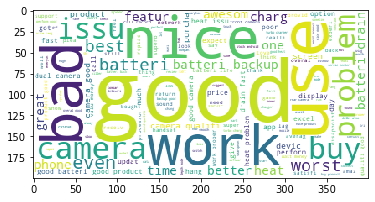

In [75]:
cluster0 = reviews[reviews['cluster_predicted'] == 0]
text0 = ' '.join(reviews['clean_review'])
wc0 = WordCloud(background_color = 'white').generate(text0)
plt.imshow(wc0)

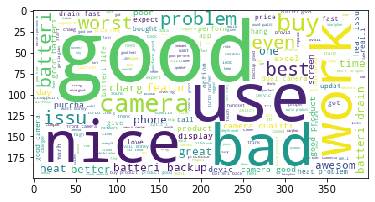

In [76]:
cluster1 = reviews[reviews['cluster_predicted'] == 1]
text1 = ' '.join(reviews['clean_review'])
wc1 = WordCloud(background_color = 'white').generate(text1)
plt.imshow(wc1)

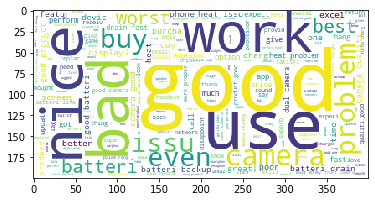

In [77]:
cluster2 = reviews[reviews['cluster_predicted'] == 2]
text2 = ' '.join(reviews['clean_review'])
wc2 = WordCloud(background_color = 'white').generate(text2)
plt.imshow(wc2)

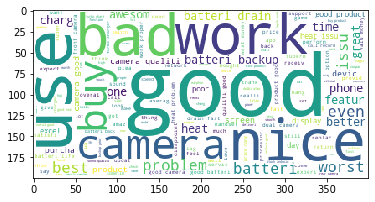

In [78]:
cluster3 = reviews[reviews['cluster_predicted'] == 3]
text3 = ' '.join(reviews['clean_review'])
wc3 = WordCloud(background_color = 'white').generate(text3)
plt.imshow(wc3)

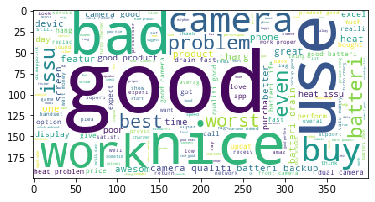

In [79]:
cluster4 = reviews[reviews['cluster_predicted'] == 4]
text4 = ' '.join(reviews['clean_review'])
wc4 = WordCloud(background_color = 'white').generate(text4)
plt.imshow(wc4)

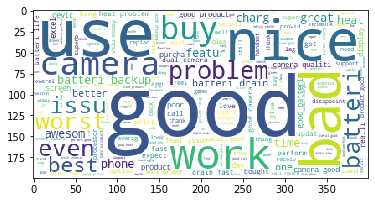

In [80]:
cluster5 = reviews[reviews['cluster_predicted'] == 5]
text5 = ' '.join(reviews['clean_review'])
wc5 = WordCloud(background_color = 'white').generate(text5)
plt.imshow(wc5)

In [81]:
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                        clean_review  sent_score  \
0                             good need updat improv           3   
1  worst bought ever batteri drain like hell back...          -8   
2                    get cash back alreadi january..           0   
3                                               good           3   
4  worst everthey chang last problem still return...          -7   

   sent_prediction                           clean_review_not_stemmed  \
0                1                     good need updates improvements   
1                0  worst bought ever battery draining like hell b...   
2                0                    get cash back already january..   
3                1                                               good   
4                0  worst everthey changed last problem still retu...   

   sent_score_w/o_stemming  sent_prediction2  vader_score  vader_prediction  \
0                        3                 1       0.5994                 1   
1                       -8                 0      -0.8720                 0   
2                        0                 0       0.0000                 0   
3                        3                 1       0.4404                 1   
4                       -7                 0      -0.8289                 0   

   cluster_predicted  
0                  5  
1                  2  
2                  5  
3                  0  
4                  5

In [82]:
label = []
for i in reviews['vader_score']:
    if i >= -1 and i < -0.5:
        label.append('Very bad')
    elif i >= -0.5 and i < -0.2:
        label.append('Bad')
    elif i >= -0.2 and i < 0.2:
        label.append('Neutral')
    elif i >= -0.2 and i < 0.5:
        label.append('Good')
    else:
        label.append('Very good')
        
reviews['vader_label'] = label
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                        clean_review  sent_score  \
0                             good need updat improv           3   
1  worst bought ever batteri drain like hell back...          -8   
2                    get cash back alreadi january..           0   
3                                               good           3   
4  worst everthey chang last problem still return...          -7   

   sent_prediction                           clean_review_not_stemmed  \
0                1                     good need updates improvements   
1                0  worst bought ever battery draining like hell b...   
2                0                    get cash back already january..   
3                1                                               good   
4                0  worst everthey changed last problem still retu...   

   sent_score_w/o_stemming  sent_prediction2  vader_score  vader_prediction  \
0                        3                 1       0.5994                 1   
1                       -8                 0      -0.8720                 0   
2                        0                 0       0.0000                 0   
3                        3                 1       0.4404                 1   
4                       -7                 0      -0.8289                 0   

   cluster_predicted vader_label  
0                  5   Very good  
1                  2    Very bad  
2                  5     Neutral  
3                  0        Good  
4                  5    Very bad

In [83]:
reviews.vader_label.unique()

array(['Very good', 'Very bad', 'Neutral', 'Good', 'Bad'], dtype=object)

In [84]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

In [85]:
le = LabelEncoder()
reviews['vader_label_le'] = le.fit_transform(reviews.vader_label)
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                        clean_review  sent_score  \
0                             good need updat improv           3   
1  worst bought ever batteri drain like hell back...          -8   
2                    get cash back alreadi january..           0   
3                                               good           3   
4  worst everthey chang last problem still return...          -7   

   sent_prediction                           clean_review_not_stemmed  \
0                1                     good need updates improvements   
1                0  worst bought ever battery draining like hell b...   
2                0                    get cash back already january..   
3                1                                               good   
4                0  worst everthey changed last problem still retu...   

   sent_score_w/o_stemming  sent_prediction2  vader_score  vader_prediction  \
0                        3                 1       0.5994                 1   
1                       -8                 0      -0.8720                 0   
2                        0                 0       0.0000                 0   
3                        3                 1       0.4404                 1   
4                       -7                 0      -0.8289                 0   

   cluster_predicted vader_label  vader_label_le  
0                  5   Very good               4  
1                  2    Very bad               3  
2                  5     Neutral               2  
3                  0        Good               1  
4                  5    Very bad               3

In [86]:
x = reviews.clean_review
y = reviews.sentiment

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [89]:
print(x_train_cv.shape, x_test_cv.shape)

(11740, 9303) (2935, 9303)


In [90]:
mnb = MultinomialNB()
mnb.fit(x_train_cv, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [91]:
y_pred = mnb.predict(x_test_cv)
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred) * 100

84.08858603066439

In [93]:
confusion_matrix(y_test, y_pred)

array([[1272,  247],
       [ 220, 1196]], dtype=int64)

### Cosine Similarity

In [94]:
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                        clean_review  sent_score  \
0                             good need updat improv           3   
1  worst bought ever batteri drain like hell back...          -8   
2                    get cash back alreadi january..           0   
3                                               good           3   
4  worst everthey chang last problem still return...          -7   

   sent_prediction                           clean_review_not_stemmed  \
0                1                     good need updates improvements   
1                0  worst bought ever battery draining like hell b...   
2                0                    get cash back already january..   
3                1                                               good   
4                0  worst everthey changed last problem still retu...   

   sent_score_w/o_stemming  sent_prediction2  vader_score  vader_prediction  \
0                        3                 1       0.5994                 1   
1                       -8                 0      -0.8720                 0   
2                        0                 0       0.0000                 0   
3                        3                 1       0.4404                 1   
4                       -7                 0      -0.8289                 0   

   cluster_predicted vader_label  vader_label_le  
0                  5   Very good               4  
1                  2    Very bad               3  
2                  5     Neutral               2  
3                  0        Good               1  
4                  5    Very bad               3

In [95]:
reviews.review[1]

"Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me."

In [96]:
tfidf = TfidfVectorizer(stop_words = 'english')
X = tfidf.fit_transform(reviews.clean_review)

In [97]:
df_tfidf = pd.DataFrame(X.toarray(), columns = tfidf.get_feature_names())
df_tfidf.head()

00  000  000000000  000mah   01  01_04_2018   02  02may   03   04  ...  \
0  0.0  0.0        0.0     0.0  0.0         0.0  0.0    0.0  0.0  0.0  ...   
1  0.0  0.0        0.0     0.0  0.0         0.0  0.0    0.0  0.0  0.0  ...   
2  0.0  0.0        0.0     0.0  0.0         0.0  0.0    0.0  0.0  0.0  ...   
3  0.0  0.0        0.0     0.0  0.0         0.0  0.0    0.0  0.0  0.0  ...   
4  0.0  0.0        0.0     0.0  0.0         0.0  0.0    0.0  0.0  0.0  ...   

    இல   என   ஏற   ஒன   கவ  பரம  பலம   ரண   றப   லல  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 10477 columns]

In [98]:
from sklearn.metrics.pairwise import cosine_similarity

### 1. For the second review of Lenovo K8, get the top 5 similar reviews.

In [99]:
reviews.clean_review[1]

'worst bought ever batteri drain like hell backup hour internet use even put idl get discharged.thi biggest lie lenov expect make full say batteri 4000mah booster charger fake take least hour fulli charged.do know surviv make full us.pleas els regret like'

In [100]:
top_5_similar = (cosine_similarity(df_tfidf[1:2], df_tfidf.drop(df_tfidf.index[1])).flatten().argsort()[::-1]+1)[:5]
top_5_similar

array([5554, 8437, 3350, 1611, 4846], dtype=int64)

In [101]:
for i in top_5_similar:
    print('Review in', i, ':', reviews.clean_review[i])

Review in 5554 : batteri perform good drain within hour also turbo charg take hour complet charg featur good batteri good use internet drain hour
Review in 8437 : batteri backup less hour drain fast
Review in 3350 : batteri issu full charg 100 use hour batteri drain fulli
Review in 1611 : worst heat batteri drain hour use take hour charg money wast
Review in 4846 : worst ever batteri give backup maximum hour internet.do buy


### 2. For the review with the least polarity score, get the top 5 similar reviews.

In [102]:
reviews['vader_score'].min()

-0.9971

In [103]:
worst_review = reviews[reviews['vader_score'] == -0.9971]
worst_review

sentiment                                             review  \
8075          0  Waste waste waste waste waste waste waste wast...   

                                           clean_review  sent_score  \
8075  wast wast wast wast wast wast wast wast wast w...           0   

      sent_prediction                           clean_review_not_stemmed  \
8075                0  waste waste waste waste waste waste waste wast...   

      sent_score_w/o_stemming  sent_prediction2  vader_score  \
8075                      -28                 0      -0.9971   

      vader_prediction  cluster_predicted vader_label  vader_label_le  
8075                 0                  5    Very bad               3

In [104]:
reviews.clean_review[8075]

'wast wast wast wast wast wast wast wast wast wast wast wast wast wast wast wast wast wast wast wast wast wast wast wast wast wast wast wast'

In [105]:
cs = cosine_similarity(df_tfidf)

In [106]:
top_5_worst = (cosine_similarity(df_tfidf[8075:8076], df_tfidf.drop(df_tfidf.index[8075])).flatten().argsort()[::-1])[:5]
top_5_worst

array([3054, 4917, 4381, 7770, 6201], dtype=int64)

In [107]:
for i in top_5_worst:
    print('Review in', i, ':', reviews.clean_review[i])

Review in 3054 : wast
Review in 4917 : wast
Review in 4381 : wast
Review in 7770 : wast
Review in 6201 : wast


### Similar Words

In [108]:
cs = cosine_similarity(df_tfidf.T)

In [109]:
def get_similar_words(input_word, sim_mat):
    cos_vals = sim_mat[input_word].sort_values(ascending = False)
    similar_words = cos_vals.drop(input_word).head()
    return similar_words

sim_mat = cosine_similarity(df_tfidf.T)
sim_mat = pd.DataFrame(sim_mat, columns = df_tfidf.columns, index = df_tfidf.columns)    
get_similar_words('drain', sim_mat)

fast       0.464289
batteri    0.373364
quick      0.168287
idl        0.158494
hour       0.136532
Name: drain, dtype: float64

In [110]:
# Understanding how the function works
sim_mat['charge'].sort_values(ascending = False).drop('charge').head(5)

headache     0.264044
1and         0.211516
drine        0.187391
backup7      0.177614
goodcharg    0.177614
Name: charge, dtype: float64